### Data loading

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
data_test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
# Droping id col
data_train = data_train.drop('id', axis=1)
data_test = data_test.drop('id', axis=1)

In [6]:
# Features descriptive analysis.
data_train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='RdPu')\
                            .background_gradient(subset=['max'], cmap='BuPu')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


In [7]:
# Target distribution
target_counter = data_train.target.value_counts(sort=True, ascending=False)

fig = go.Figure([go.Bar(x=target_counter.index, y=target_counter.values, marker_color='crimson')])
fig.show()

In [8]:
# Target column clasess into numbers

label_dict = {val:idx for idx, val in enumerate(sorted(data_train['target'].unique()))}
data_train['target'] = data_train['target'].map(label_dict)
data_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


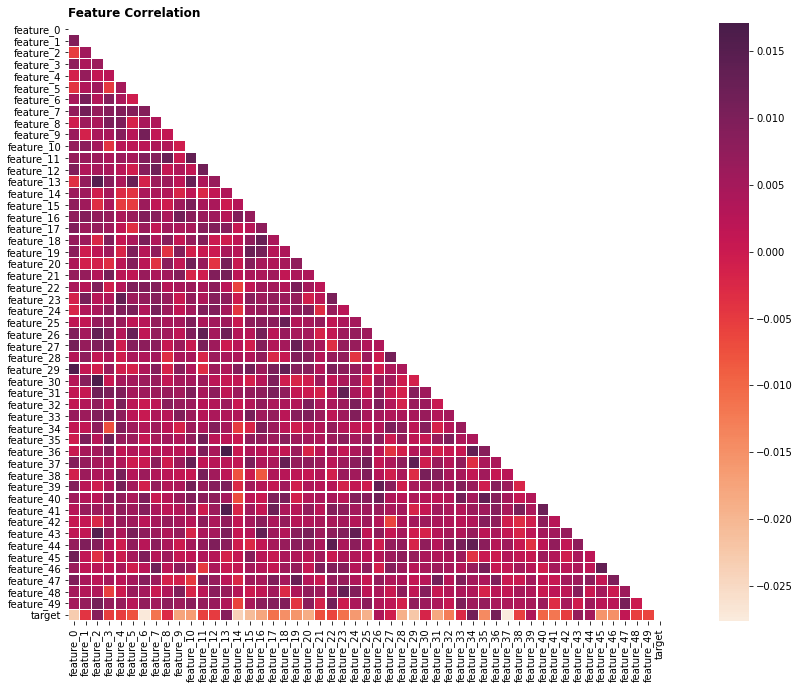

In [9]:
# Scatterplot matrix

fig, ax = plt.subplots(figsize=(19, 11))

corr = data_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
        square = True, center=0, linewidth=0.2,
        cmap = sns.color_palette("rocket_r", as_cmap=True),
        mask = mask, ax = ax) 

ax.set_title('Feature Correlation', loc='left', fontweight='bold')
plt.show()

### Outliers

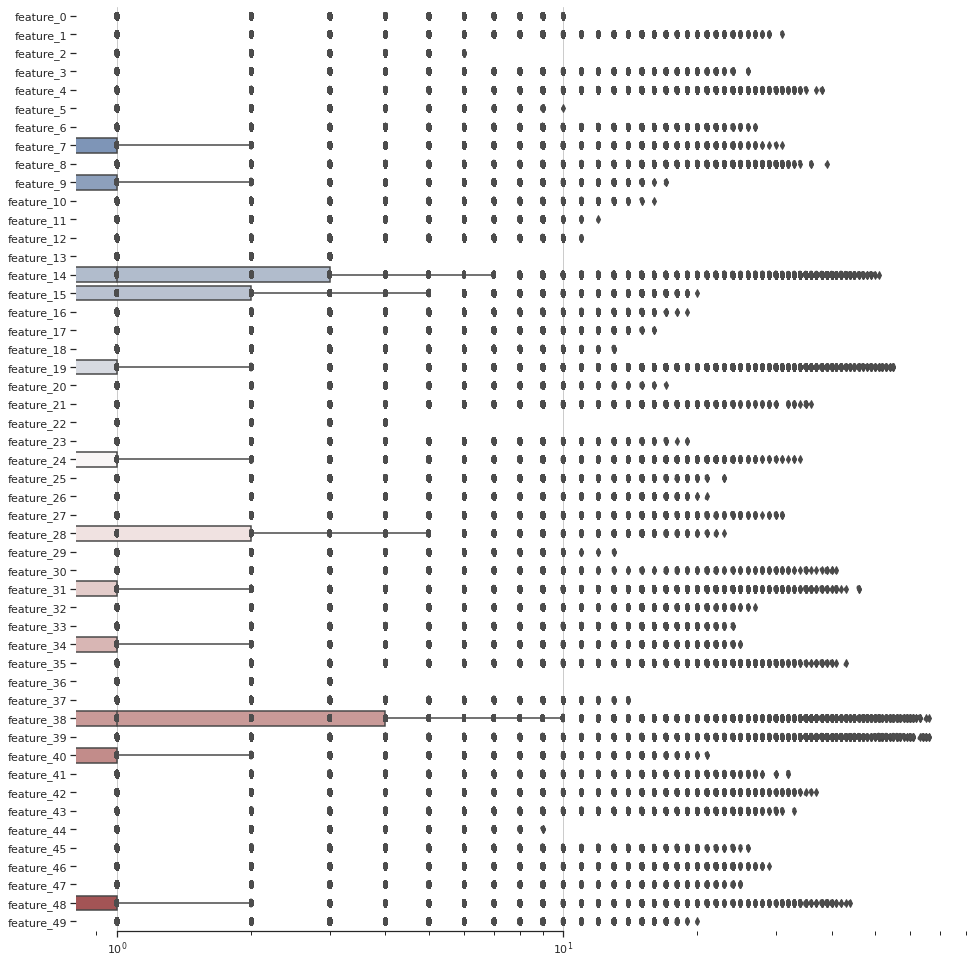

In [10]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(16, 17))
ax.set_xscale("log")

sns.boxplot(data=data_train.iloc[:,:-1], orient="h", palette="vlag")

sns.stripplot(data=data_train.iloc[:,:-1], orient="h",
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [11]:
# outliers removal

data_train_wo = data_train.copy()

for i in data_train_wo.iloc[:,:-1].columns:
  data_train_wo = data_train_wo[(data_train_wo[i] >= data_train[i].quantile(.00)) & (data_train_wo[i] <= data_train[i].quantile(.999))]


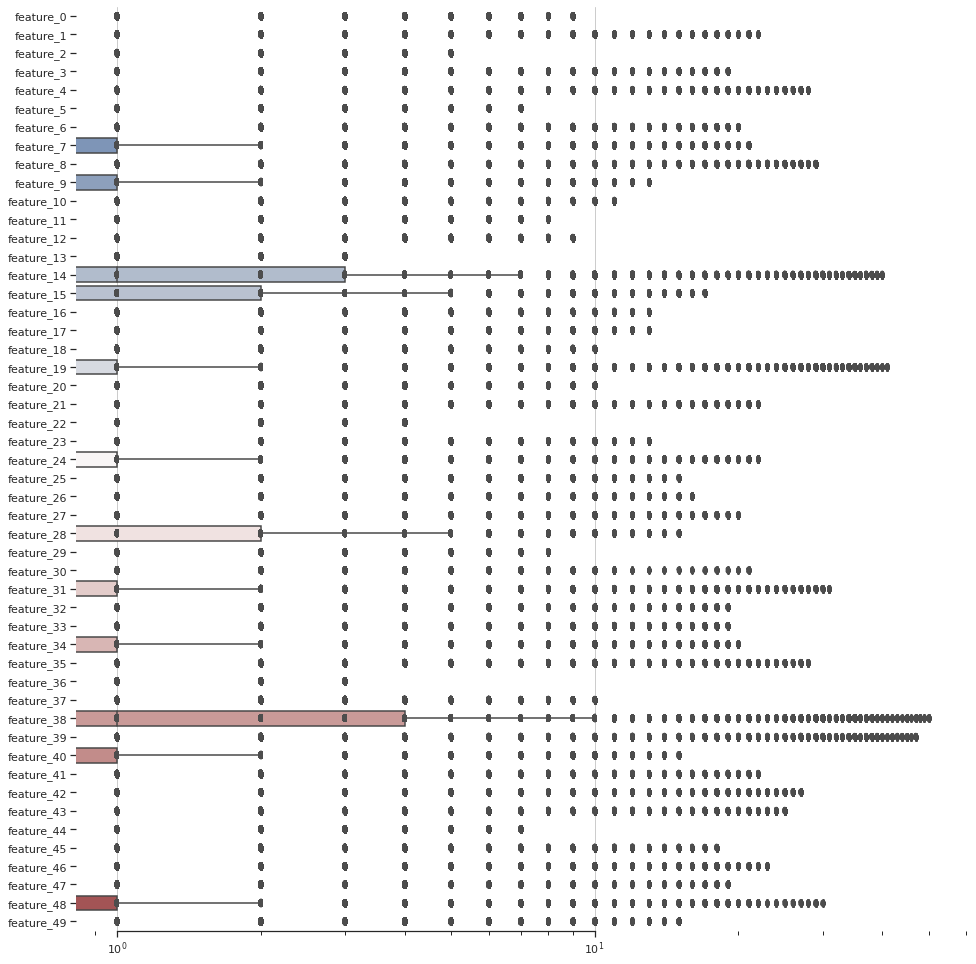

In [12]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(16, 17))
ax.set_xscale("log")

sns.boxplot(data=data_train_wo.iloc[:,:-1], orient="h", palette="vlag")

sns.stripplot(data=data_train_wo.iloc[:,:-1], orient="h",
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Scaling data

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_train = data_train.copy()
scaled_train.iloc[:,:-1] = sc.fit_transform(scaled_train.iloc[:,:-1])
scaled_test = pd.DataFrame(sc.transform(data_test), columns=list(data_test.columns))

In [14]:
scaled_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,-0.277527,-0.218277,1.704970,-0.32016,0.143682,-0.267522,-0.312142,-0.456386,-0.264506,-0.493718,-0.279781,-0.399194,-0.408843,-0.210719,-0.557955,-0.574987,-0.284103,2.891096,-0.429781,-0.329467,-0.261888,-0.303281,-0.333555,-0.319167,-0.409517,-0.309179,-0.236975,-0.188859,-0.588449,-0.22932,0.521451,-0.413351,-0.189985,-0.268201,-0.048997,-0.30789,-0.28352,-0.363666,-0.556420,-0.180752,1.328643,-0.290584,-0.230019,8.633707,-0.215268,-0.244956,-0.238007,-0.262239,-0.376795,-0.331437,1
1,-0.277527,-0.218277,-0.219658,-0.32016,0.502682,1.395966,-0.312142,-0.456386,-0.264506,-0.493718,-0.279781,-0.399194,-0.408843,-0.210719,-0.557955,0.813837,-0.284103,1.242182,-0.429781,-0.329467,-0.261888,-0.303281,-0.333555,-0.319167,-0.409517,-0.309179,-0.236975,-0.188859,-0.588449,-0.22932,-0.217672,-0.413351,1.179224,-0.268201,-0.450115,-0.30789,-0.28352,-0.363666,-0.556420,-0.180752,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,-0.376795,-0.331437,0
2,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,-0.456386,-0.264506,0.556612,-0.279781,-0.399194,0.477114,-0.210719,-0.343136,-0.574987,-0.284103,-0.406732,-0.429781,-0.118915,-0.261888,1.987467,3.277523,0.503344,-0.015800,-0.309179,0.433298,-0.188859,0.475596,-0.22932,-0.217672,-0.413351,-0.189985,8.052056,0.352121,-0.30789,2.14950,6.027498,0.000525,-0.180752,-0.413665,-0.290584,0.204610,-0.261044,-0.215268,-0.244956,-0.238007,8.478180,0.399421,-0.331437,0
3,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,0.657729,-0.264506,-0.493718,-0.279781,-0.399194,-0.408843,2.574730,0.945782,4.517370,0.494625,-0.406732,2.306402,-0.118915,-0.261888,-0.303281,-0.333555,-0.319167,-0.409517,-0.309179,-0.236975,-0.188859,-0.056426,-0.22932,0.521451,-0.413351,-0.189985,-0.268201,-0.048997,-0.30789,-0.28352,-0.363666,0.186174,-0.180752,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,0.011313,-0.331437,3
4,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,-0.456386,-0.264506,-0.493718,-0.279781,-0.399194,-0.408843,-0.210719,-0.128316,-0.574987,6.724449,1.242182,-0.429781,-0.329467,-0.261888,-0.303281,-0.333555,-0.319167,-0.409517,-0.309179,-0.236975,-0.188859,-0.588449,-0.22932,-0.217672,-0.112084,-0.189985,-0.268201,-0.450115,-0.30789,-0.28352,-0.363666,-0.370772,-0.180752,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,0.011313,-0.331437,1


In [15]:
scaled_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,1.394741,1.029101,-0.264506,-0.493718,4.179877,-0.399194,-0.408843,-0.210719,-0.557955,-0.112046,0.494625,-0.406732,0.482280,-0.329467,0.816330,-0.303281,-0.333555,-0.319167,-0.409517,-0.309179,3.114391,-0.188859,2.071663,-0.22932,-0.217672,-0.413351,-0.189985,-0.268201,-0.450115,-0.307890,-0.28352,-0.363666,0.186174,-0.180752,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,-0.376795,-0.331437
1,-0.277527,-0.218277,1.704970,-0.32016,-0.215317,-0.267522,0.541300,-0.456386,1.785130,3.182439,-0.279781,-0.399194,-0.408843,-0.210719,-0.557955,0.813837,-0.284103,-0.406732,1.394341,-0.329467,-0.261888,-0.303281,-0.333555,-0.319167,-0.409517,-0.309179,2.444118,-0.188859,0.475596,-0.22932,-0.217672,0.189184,-0.189985,1.045523,1.956593,0.708271,-0.28352,-0.363666,0.557471,-0.180752,1.328643,-0.290584,0.204610,-0.261044,-0.215268,-0.244956,0.222524,-0.262239,0.399421,0.263475
2,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,-0.456386,0.028300,-0.493718,-0.279781,-0.399194,-0.408843,-0.210719,-0.557955,-0.574987,-0.284103,-0.406732,-0.429781,3.881568,-0.261888,-0.303281,-0.333555,-0.319167,1.165350,2.717313,-0.236975,-0.188859,-0.588449,-0.22932,-0.217672,0.490452,-0.189985,-0.268201,-0.450115,-0.307890,-0.28352,1.462381,1.485713,-0.180752,-0.413665,-0.290584,-0.230019,0.162516,-0.215268,-0.244956,-0.238007,-0.262239,1.951853,-0.331437
3,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,-0.312142,-0.085014,0.028300,-0.493718,-0.279781,-0.399194,-0.408843,-0.210719,-0.557955,-0.112046,-0.284103,-0.406732,-0.429781,0.512740,0.816330,-0.303281,-0.333555,0.503344,-0.409517,-0.309179,0.433298,0.439248,-0.056426,-0.22932,-0.217672,-0.413351,0.494620,1.483432,-0.450115,-0.307890,-0.28352,-0.363666,-0.556420,-0.180752,-0.413665,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,2.525181,5.788820,5.056717,1.453298
4,-0.277527,-0.218277,-0.219658,-0.32016,-0.215317,-0.267522,0.114579,-0.456386,0.906715,-0.493718,-0.279781,0.589522,-0.408843,-0.210719,1.375421,-0.574987,-0.284103,-0.406732,-0.429781,-0.329467,-0.261888,1.071168,-0.333555,-0.319167,-0.409517,-0.309179,-0.236975,-0.188859,0.475596,-0.22932,-0.217672,-0.112084,0.494620,-0.268201,-0.048997,-0.307890,-0.28352,-0.363666,-0.556420,-0.180752,0.167105,-0.290584,-0.230019,-0.261044,-0.215268,-0.244956,-0.238007,-0.262239,-0.376795,-0.331437


### H2O

#### Requirements

In [16]:
# installing java
! apt-get install default-jre
! java -version
# install h2o
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
     |████████████████████████████████| 164.8MB 56kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854343 sha256=97d14020c8b9760fb2514543a18ba625e6595d041574fcdd2ea38735517673bf
  Stored in directory: /root/.cache/pip/wheels/4f/bb/82/0988682f9abd0b5e95109a4aae6793dd427173b6dc671d9252
Successfully built h2o


In [17]:
# Libraries
import h2o
from h2o.automl import *
%matplotlib inline

#### Model

### Grid searching and predictions

In [18]:
# Initialize H2O instance
import os

startup  = '/home/h2o/bin/aquarium_startup'
shutdown = '/home/h2o/bin/aquarium_stop'

if os.path.exists(startup):
    os.system(startup)
    local_url = 'http://localhost:54321/h2o'
    aquarium = True
else:
    local_url = 'http://localhost:54321'
    aquarium = False

In [19]:
h2o.init(url = local_url)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm7pnp6rf
  JVM stdout: /tmp/tmpm7pnp6rf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm7pnp6rf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,"7 days, 19 hours and 9 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_knmc9r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [28]:
h2o_train = h2o.H2OFrame(scaled_train[:-3000].copy())
h2o_valid = h2o.H2OFrame(scaled_train[-3000:].copy())
#h2o_test = h2o.H2OFrame(test_2d_df.copy())

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [29]:
h2o_train["target"] = h2o_train["target"].asfactor()

In [30]:
# Setting the limits to 25 models that will take 15 minutes
aml = H2OAutoML(max_runtime_secs = 60*25, 
                max_models = 25,  
                seed = 42 
                )

%time aml.train(x = list(scaled_train.iloc[:,:-1].columns), y = "target", training_frame = h2o_train, validation_frame = h2o_valid)

AutoML progress: |
15:50:36.722: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%
CPU times: user 4min 8s, sys: 8.05 s, total: 4min 17s
Wall time: 2h 32min 42s


In [31]:
# Leaderboard
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
XGBoost_grid__1_AutoML_20210527_155036_model_1,0.737027,1.11125,0.627144,0.393309,nan,nan
StackedEnsemble_AllModels_AutoML_20210527_155036,0.738656,1.09406,0.625526,0.391283,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210527_155036,0.738789,1.09468,0.625741,0.391552,nan,nan
DeepLearning_grid__1_AutoML_20210527_155036_model_1,0.739513,1.24078,0.639483,0.408938,nan,nan
XRT_1_AutoML_20210527_155036,0.742128,1.18275,0.63441,0.402475,nan,nan
XGBoost_grid__1_AutoML_20210527_155036_model_2,0.742387,1.12728,0.647983,0.419882,nan,nan
GBM_grid__1_AutoML_20210527_155036_model_1,0.742876,1.10092,0.63274,0.40036,nan,nan
XGBoost_2_AutoML_20210527_155036,0.743342,1.16976,0.675393,0.456156,nan,nan
DeepLearning_grid__2_AutoML_20210527_155036_model_1,0.743908,1.19781,0.623714,0.389019,nan,nan
DRF_1_AutoML_20210527_155036,0.743984,1.16931,0.634356,0.402408,nan,nan


In [32]:
# Predicting values

predintions = aml.predict(h2o.H2OFrame(scaled_test))
predintions_df = h2o.as_list(predintions)

Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [33]:
predintions_df.head()

,predict,p0,p1,p2,p3
0,1,0.067850,0.453474,0.380978,0.097699
1,1,0.046118,0.776623,0.085055,0.092204
2,1,0.068605,0.654144,0.174223,0.103028
3,1,0.072845,0.578384,0.222956,0.125815
4,1,0.054991,0.624257,0.217255,0.103497


In [34]:
# Submission to CSV

submission = predintions_df[['p0', 'p1', 'p2', 'p3']]
submission.rename(columns={"p0": "Class_1", "p1": "Class_2", "p2": "Class_3", "p3": "Class_4"}, inplace=True)
submission.insert(0, 'id', range(100000, 100000 + len(submission)))
submission.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.067850,0.453474,0.380978,0.097699
1,100001,0.046118,0.776623,0.085055,0.092204
2,100002,0.068605,0.654144,0.174223,0.103028
3,100003,0.072845,0.578384,0.222956,0.125815
4,100004,0.054991,0.624257,0.217255,0.103497


In [35]:
submission.to_csv('h2o_automl_1200s_scaled_wo_7.csv', index=False)
submission.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.067850,0.453474,0.380978,0.097699
1,100001,0.046118,0.776623,0.085055,0.092204
2,100002,0.068605,0.654144,0.174223,0.103028
3,100003,0.072845,0.578384,0.222956,0.125815
4,100004,0.054991,0.624257,0.217255,0.103497


PyCaret